# **PREDIÇÃO DE AVC**

O objetivo deste trabalho é fazer uma análise estatística do Behavioral Risk Factor Surveillance System 2015 (BRFSS2015) na ocorrência de acidente vascular cerebral (AVC), pesquisa feita pelo Centro de Controle e Prevenção de Doenças (CDC) dos Estados Unidos.

Link do dataset: https://www.kaggle.com/datasets/prosperchuks/health-dataset

## Bibliotecas Utilizadas 

* [pandas](https://https://pandas.pydata.org)
* [matplotlib](https://matplotlib.org)
* [seaborn](https://seaborn.pydata.org)
* [scikit-learn](https://scikit-learn.org/)

## **Dependências**

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import io

In [25]:
from google.colab import files
uploaded = files.upload()

Saving stroke_data.csv to stroke_data (4).csv


## Pré-análise do Dataset

In [26]:
df = pd.read_csv(io.BytesIO(uploaded['stroke_data.csv']))
df_nonull = df.dropna()
df_nonull.isnull().any()

sex                  False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
dtype: bool

In [27]:
df_nonull.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 40907 entries, 0 to 40909
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sex                40907 non-null  float64
 1   age                40907 non-null  float64
 2   hypertension       40907 non-null  int64  
 3   heart_disease      40907 non-null  int64  
 4   ever_married       40907 non-null  int64  
 5   work_type          40907 non-null  int64  
 6   Residence_type     40907 non-null  int64  
 7   avg_glucose_level  40907 non-null  float64
 8   bmi                40907 non-null  float64
 9   smoking_status     40907 non-null  int64  
 10  stroke             40907 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 3.7 MB


## **Análise do Dataset**

In [ ]:
df_nonull.describe() #fornece uma visão geral do dataset

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
count,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000,40907.000000
mean,0.555162,51.327303,0.213851,0.127729,0.821326,3.461095,0.514851,122.079679,30.406488,0.488572,0.500159
std,0.496954,21.624171,0.410028,0.333792,0.383083,0.780934,0.499786,57.561951,6.835305,0.499875,0.500006
min,0.000000,-9.000000,0.000000,0.000000,0.000000,0.000000,0.000000,55.120000,11.500000,0.000000,0.000000
25%,0.000000,35.000000,0.000000,0.000000,1.000000,3.000000,0.000000,78.750000,25.900000,0.000000,0.000000
50%,1.000000,52.000000,0.000000,0.000000,1.000000,4.000000,1.000000,97.920000,29.400000,0.000000,1.000000
75%,1.000000,68.000000,0.000000,0.000000,1.000000,4.000000,1.000000,167.590000,34.100000,1.000000,1.000000
max,1.000000,103.000000,1.000000,1.000000,1.000000,4.000000,1.000000,271.740000,92.000000,1.000000,1.000000


In [ ]:
df_nonull.corr() #verifica a correlação entre os tipos de dados

,sex,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
sex,1.000000,-0.115259,-0.039178,-0.045350,-0.025981,0.003121,0.003715,-0.039357,-0.006016,-0.027994,-0.111036
age,-0.115259,1.000000,0.014364,0.024541,0.006295,0.003649,0.002689,0.027271,-0.012324,-0.002068,0.058536
hypertension,-0.039178,0.014364,1.000000,0.079954,0.033778,-0.033108,-0.002614,0.203475,0.082377,-0.017774,0.257156
heart_disease,-0.045350,0.024541,0.079954,1.000000,0.071610,0.049403,0.013028,0.252018,0.021367,0.137314,0.223911
ever_married,-0.025981,0.006295,0.033778,0.071610,1.000000,0.051574,-0.057197,0.160305,0.113677,0.137487,0.181698
work_type,0.003121,0.003649,-0.033108,0.049403,0.051574,1.000000,-0.011344,0.018213,0.074738,0.052889,0.026546
Residence_type,0.003715,0.002689,-0.002614,0.013028,-0.057197,-0.011344,1.000000,0.016496,0.037189,0.017632,0.011754
avg_glucose_level,-0.039357,0.027271,0.203475,0.252018,0.160305,0.018213,0.016496,1.000000,0.242813,0.056903,0.265403
bmi,-0.006016,-0.012324,0.082377,0.021367,0.113677,0.074738,0.037189,0.242813,1.000000,0.042469,0.018307
smoking_status,-0.027994,-0.002068,-0.017774,0.137314,0.137487,0.052889,0.017632,0.056903,0.042469,1.000000,0.068449


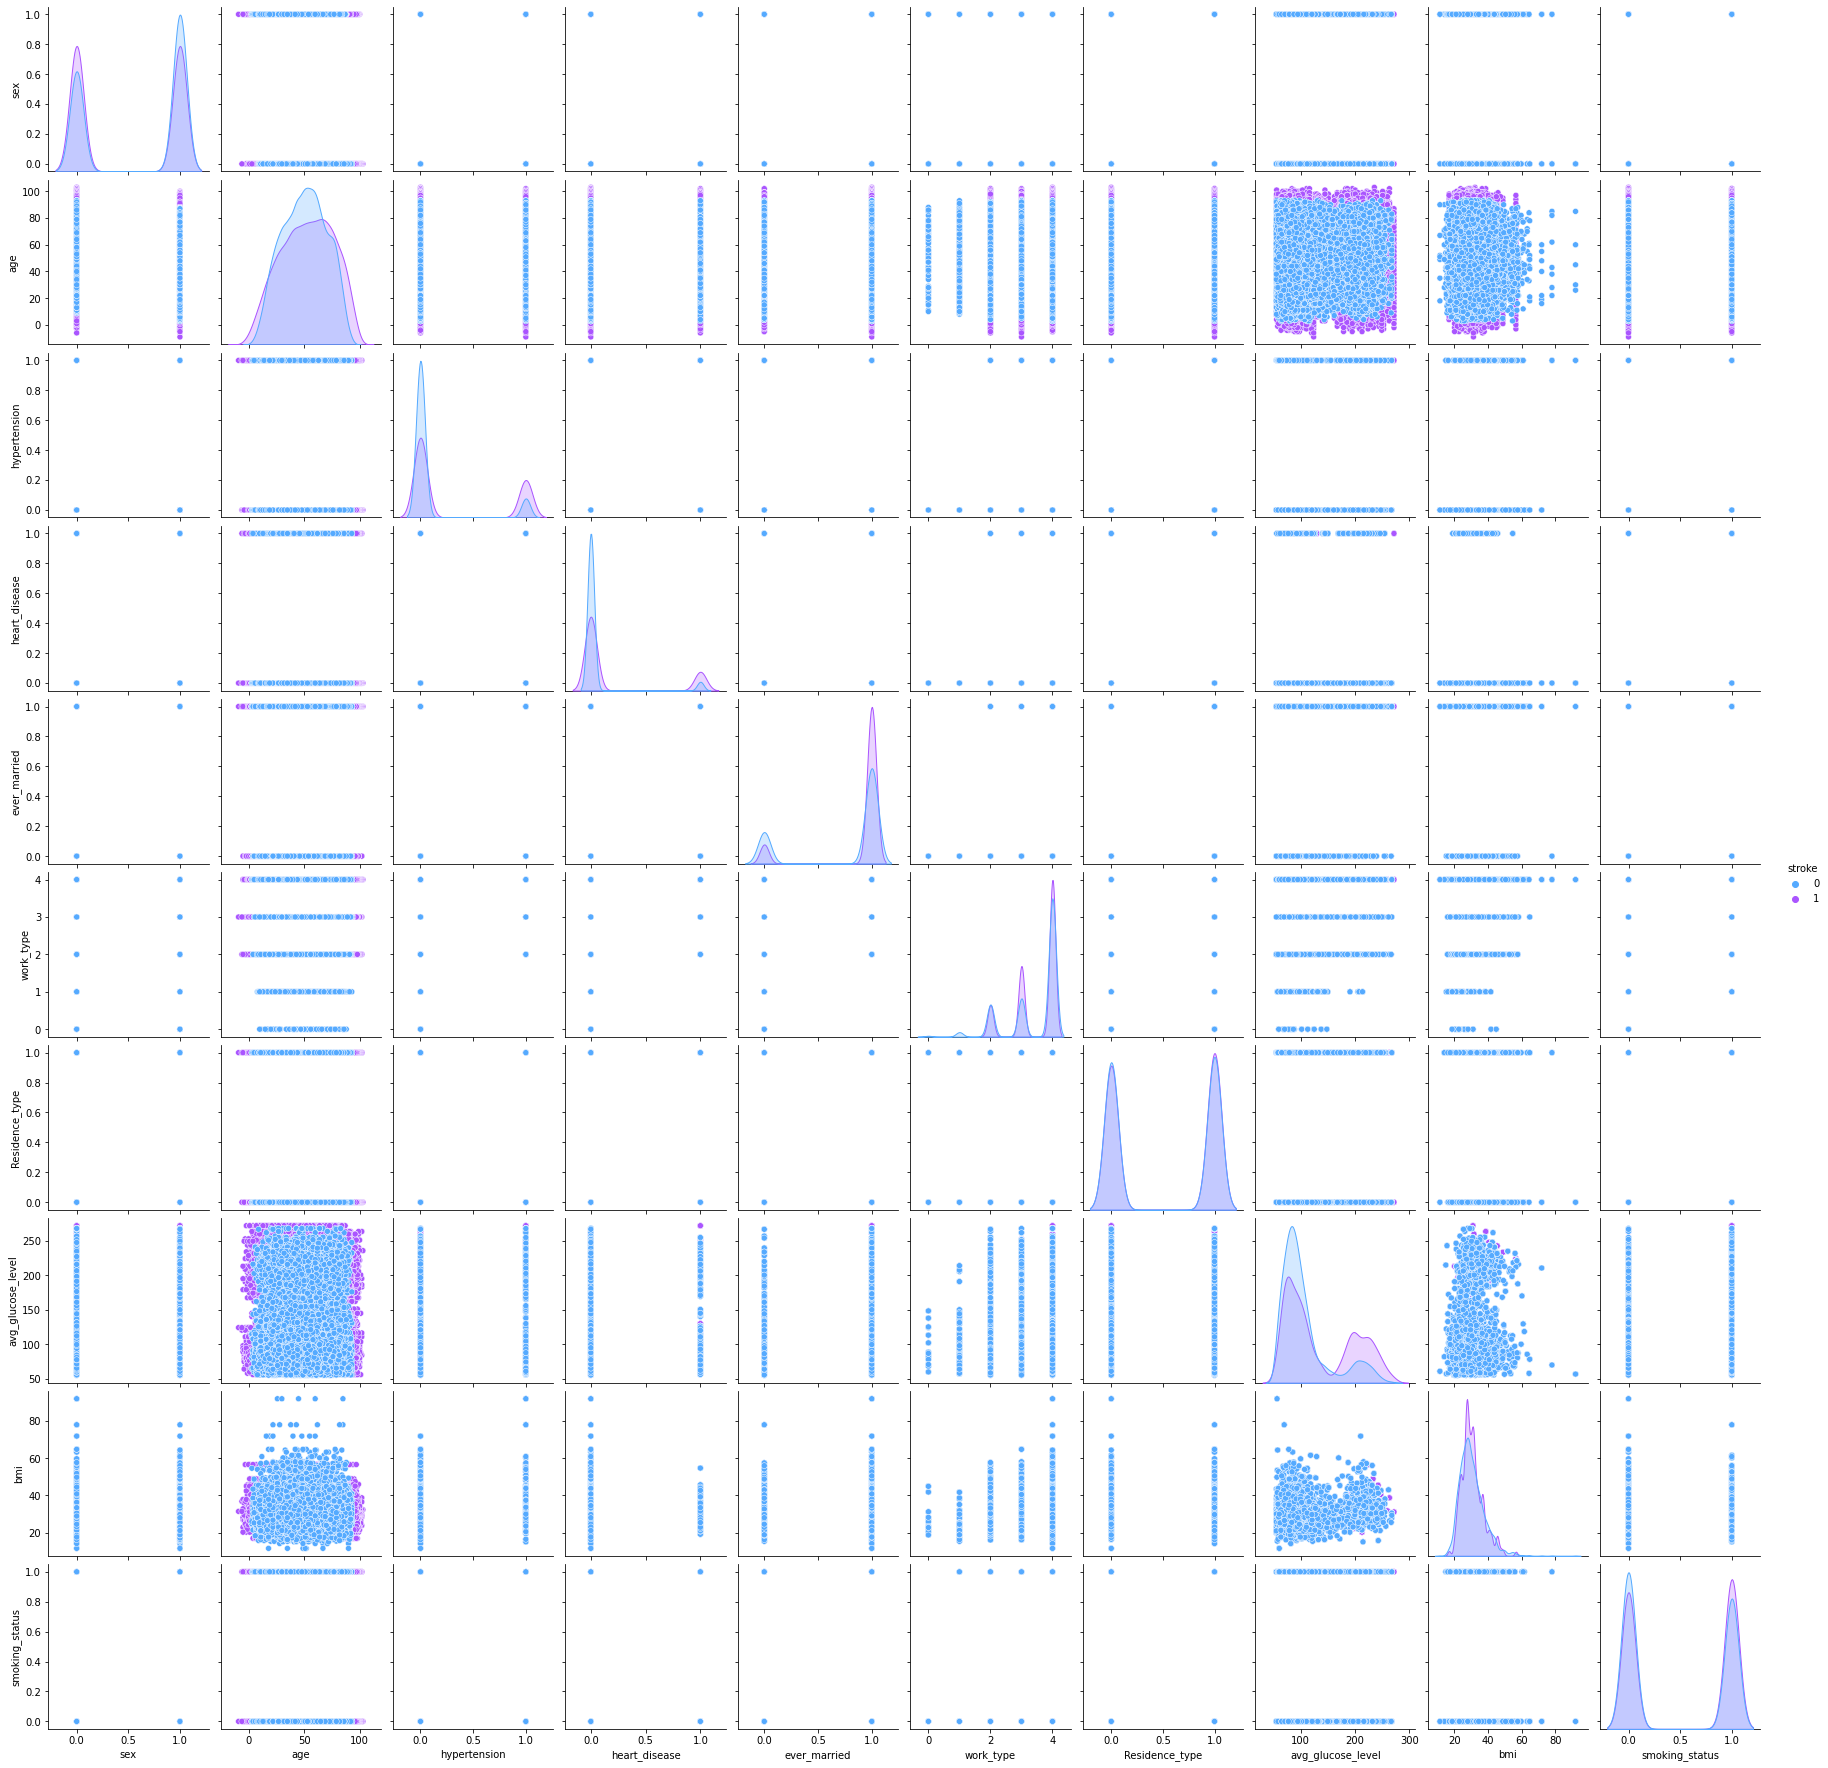

In [ ]:
sns.pairplot(df_nonull, hue='stroke', palette='cool') #exibe um gráfico de dispersão com foco na ocorrência ou não de AVC

### Análise de Ocorrência de AVC por Idade e Sexo do Indivíduo

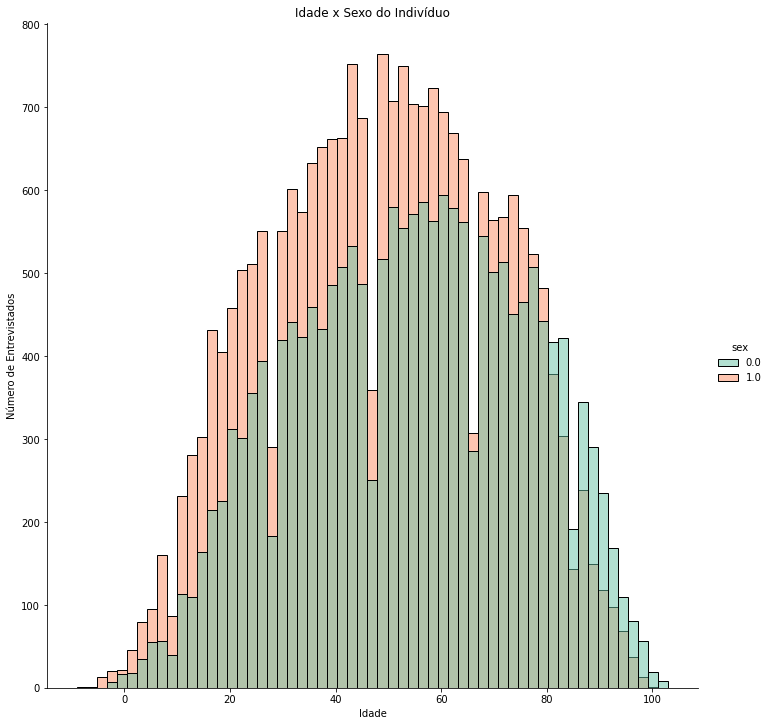

In [ ]:
dis_g = sns.displot(data = df_nonull, x = 'age', hue = 'sex', palette = 'Set2', height= 10)
dis_g.set(title = 'Idade x Sexo do Indivíduo', xlabel = 'Idade', ylabel = 'Número de Entrevistados')

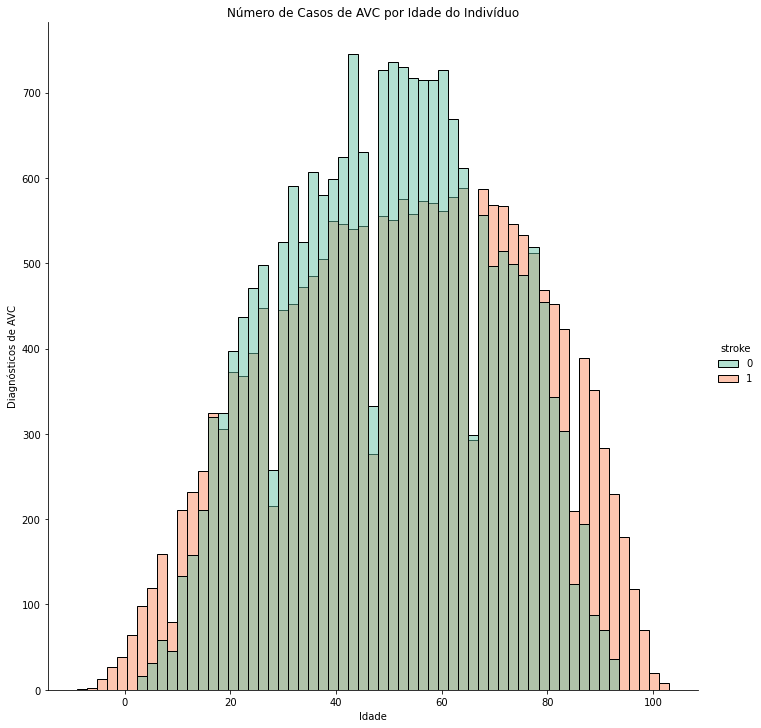

In [ ]:
dis_g = sns.displot(df_nonull, x='age', hue='stroke', palette = 'Set2', height= 10)
dis_g.set(title="Número de Casos de AVC por Idade do Indivíduo", xlabel = 'Idade', ylabel = 'Diagnósticos de AVC')
# Conclusão: em Idosos houve uma ocorrência maior de AVC. Curiosamente, em crianças e adolescente também.

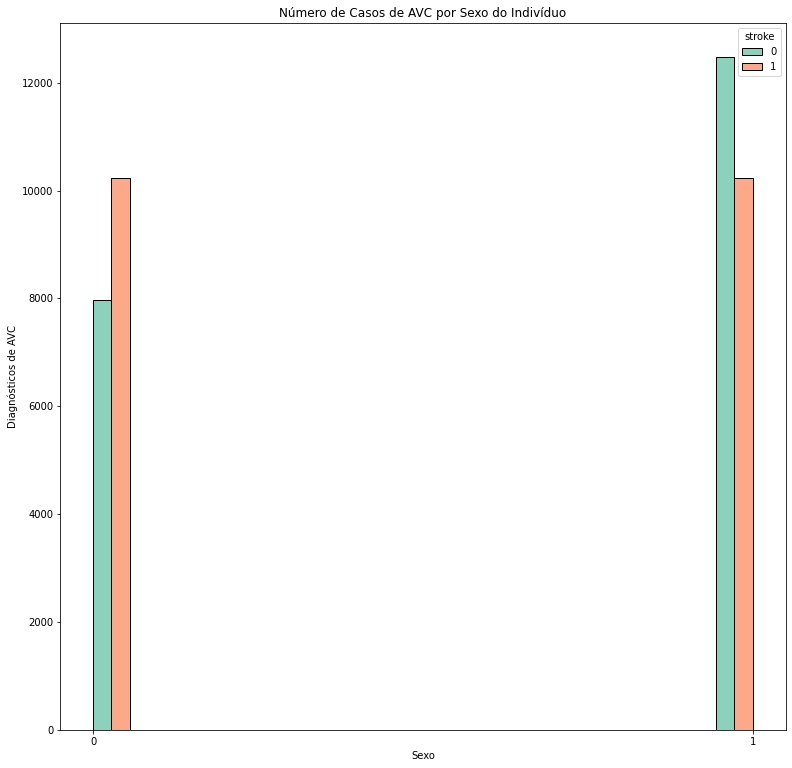

In [ ]:
plt.figure(figsize=(13,13))
hist_g = sns.histplot(data = df_nonull, x='sex', hue='stroke', multiple = 'dodge', palette = 'Set2')
hist_g.set(title="Número de Casos de AVC por Sexo do Indivíduo", xlabel = 'Sexo', ylabel = 'Diagnósticos de AVC')
hist_g.set_xticks([0,1])
# Conclusão: Mulheres tiveram um grande aumento no diagnóstico de AVC se comparado aos Homens.

### Análise de Nível Médio de Glicose com Ocorrência de AVC

[Text(0.5, 1.0, 'Ocorrência de AVC por Nível Médio de Glicose'),
 Text(0.5, 0, 'Diagnóstico de AVC'),
 Text(0, 0.5, 'Nível Médio de Glicose')]

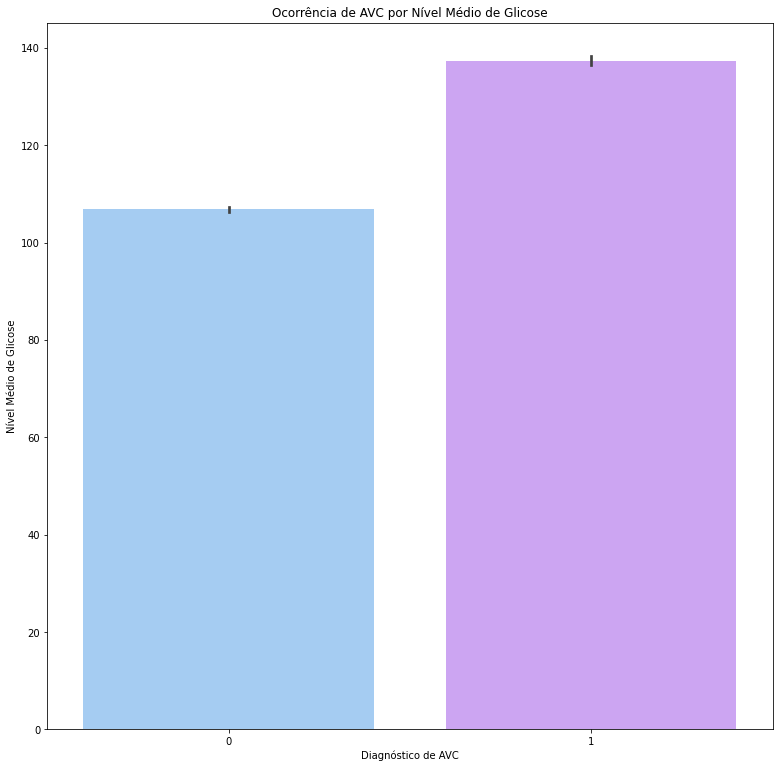

In [ ]:
plt.figure(figsize=(13,13))
bar_g = sns.barplot(x='stroke', y='avg_glucose_level', data=df_nonull, palette='cool', alpha=.6)
bar_g.set(title='Ocorrência de AVC por Nível Médio de Glicose', xlabel = "Diagnóstico de AVC", ylabel = "Nível Médio de Glicose")
# Conclusão: O Nível Médio de Glicose tem uma boa relação com número de casos de AVC

[Text(0.5, 1.0, 'Ocorrência de AVC por Nível Médio de Glicose'),
 Text(0.5, 0, 'Diagnóstico de AVC'),
 Text(0, 0.5, 'Nível Médio de Glicose')]

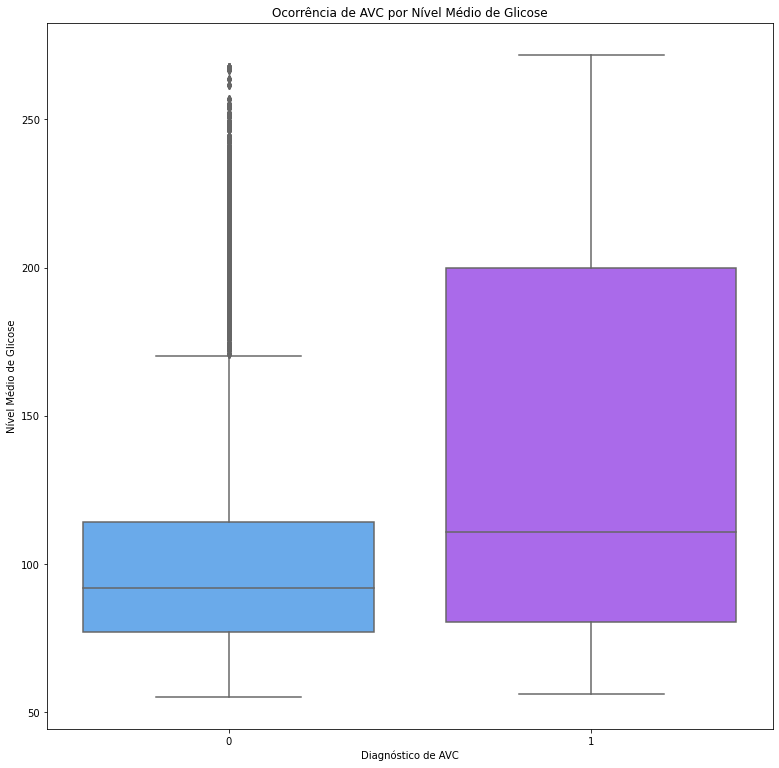

In [ ]:
plt.figure(figsize=(13,13))
box_g = sns.boxplot(x='stroke', y='avg_glucose_level', data=df_nonull, palette='cool')
box_g.set(title='Ocorrência de AVC por Nível Médio de Glicose', xlabel = "Diagnóstico de AVC", ylabel = "Nível Médio de Glicose")
# Conclusão: O Nível Médio de Glicose tem uma boa relação com número de casos de AVC

[Text(0.5, 1.0, 'Número de Casos de AVC por Nível Médio de Glicose'),
 Text(0.5, 0, 'Nível Médio de Glicose'),
 Text(0, 0.5, 'Diagnósticos de AVC')]

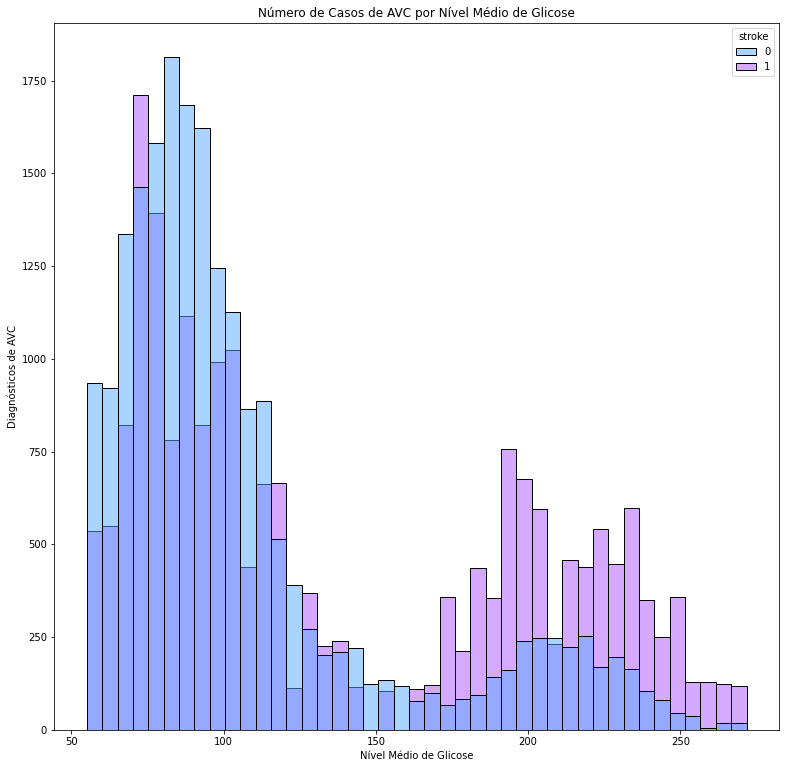

In [ ]:
plt.figure(figsize=(13,13))
hist_g = sns.histplot(data = df_nonull, x='avg_glucose_level', hue='stroke', palette = 'cool')
hist_g.set(title="Número de Casos de AVC por Nível Médio de Glicose", xlabel = 'Nível Médio de Glicose', ylabel = 'Diagnósticos de AVC')
# Conclusão: Diagnósticos de AVC estão intimamente ligados ao nível médio de glicose no sangue, sendo maior valor, maior a ocorrência

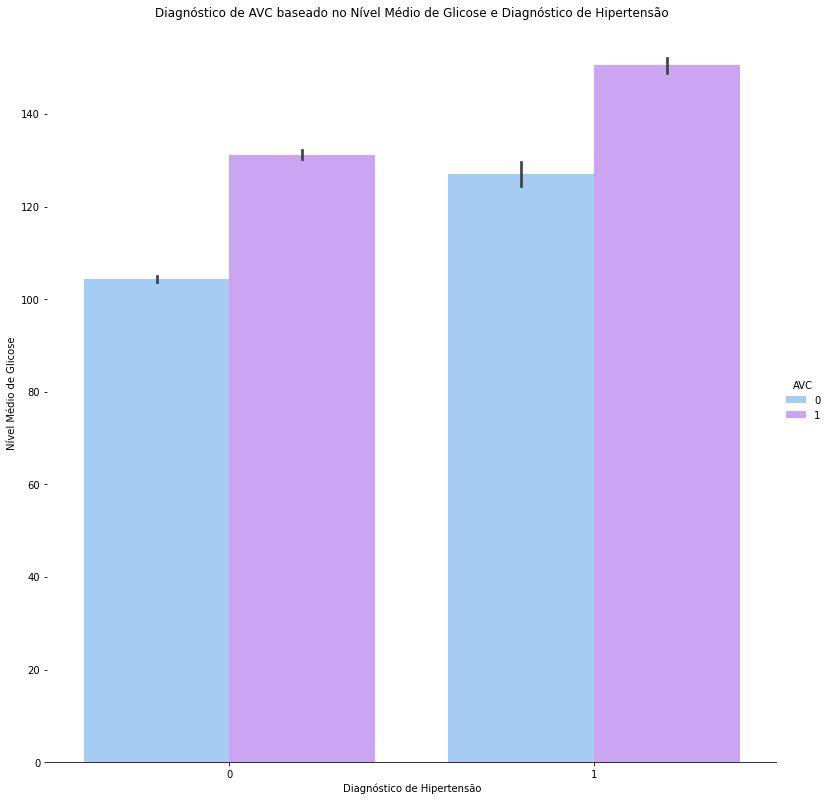

In [ ]:
cat_g = sns.catplot(data = df_nonull, kind = 'bar', x = 'hypertension', y = 'avg_glucose_level', hue='stroke', palette='cool', alpha=.6, height=11)
cat_g.despine(left=True)
cat_g.set(title="Diagnóstico de AVC baseado no Nível Médio de Glicose e Diagnóstico de Hipertensão")
cat_g.legend.set_title("AVC")
cat_g.set_axis_labels("Diagnóstico de Hipertensão", "Nível Médio de Glicose")
# Conclusão: Diagnósticos de AVC estão intimamente ligados ao nível médio de glicose no sangue e diagnósticos de Hipertensão

## **Machine Learning**

Os algoritmos de classificação utilizados foram **Decision Tree, Random Forest, SVM, KNN**. Para treino, foram escolhidas as seguintes features: 'age', para variação nas faixas de classificação; e 'hypertension', 'heart_disease' e 'avg_glucose_level', por serem as features que melhor possuem correlação com diagnósticos de AVC.

**Legenda:** 0: Sem Diagnóstico | 1: Diagnóstico de AVC

In [129]:
import sklearn.model_selection as model_selection
import graphviz

In [85]:
features = df_nonull[['age', 'hypertension', 'heart_disease', 'avg_glucose_level']].values
model_class = df_nonull['stroke'].values

In [86]:
#Dados para Treino e Teste
features_train, features_test, class_train, class_test = model_selection.train_test_split(features, model_class, train_size=0.7, random_state=1)

### Decision Tree (Árvore de Decisão)

In [115]:
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier

In [128]:
#Treinando o Modelo
avc_classifier = DecisionTreeClassifier(criterion='entropy', max_depth=5)
avc_classifier = avc_classifier.fit(features_train, class_train)

In [127]:
#Métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

prediction = avc_classifier.predict(features_test)
print(classification_report(class_test, prediction))

print("Acurácia: " + accuracy_score(class_test, prediction).astype(str))
print("Recall: " + recall_score(class_test, prediction).astype(str))
print("Precisão: " + precision_score(class_test, prediction).astype(str))
print("F1: " + f1_score(class_test, prediction, average='weighted').astype(str))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90      6127
           1       0.96      0.82      0.88      6146

    accuracy                           0.89     12273
   macro avg       0.90      0.89      0.89     12273
weighted avg       0.90      0.89      0.89     12273

Acurácia: 0.8913875987941009
Recall: 0.8153270419785226
Precisão: 0.9619888654252255
F1: 0.8907638685136766


In [105]:
# Visualização da Árvore
##dot_data = tree.export_graphviz(avc_classifier, out_file=None, 
##                      feature_names=['Idade', 'Hipertensão', 'Doença Cardíaca', 'Nv. Médio Glicose'],  
##                      class_names=avc_classifier.classes_.astype(str),  
##                     filled=True, rounded=True,  
##                      special_characters=True)  
##graph = graphviz.Source(dot_data)  
##graph

### Random Forest (Floresta Randômica)

In [109]:
from sklearn.ensemble import RandomForestClassifier

In [110]:
#Treinando o Modelo
avc_classifier = RandomForestClassifier(n_estimators=10)
avc_classifier = avc_classifier.fit(features_train, class_train)

In [111]:
#Métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

prediction = avc_classifier.predict(features_test)
print(classification_report(class_test, prediction))

print("Acurácia: " + accuracy_score(class_test, prediction).astype(str))
print("Recall: " + recall_score(class_test, prediction).astype(str))
print("Precisão: " + precision_score(class_test, prediction).astype(str))
print("F1: " + f1_score(class_test, prediction, average='weighted').astype(str))

              precision    recall  f1-score   support

           0       0.87      0.87      0.87      6127
           1       0.87      0.87      0.87      6146

    accuracy                           0.87     12273
   macro avg       0.87      0.87      0.87     12273
weighted avg       0.87      0.87      0.87     12273

Acurácia: 0.8718324777967897
Recall: 0.8747152619589977
Precisão: 0.8700436963910018
F1: 0.871831017632914


### Support Vector Machine (SVM - Máquina de Vetor de Suporte)

In [112]:
from sklearn import svm

In [113]:
#Treinando o Modelo
avc_classifier = svm.SVC()
avc_classifier.fit(features_train, class_train)

SVC()

In [114]:
#Métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

prediction = avc_classifier.predict(features_test)
print(classification_report(class_test, prediction))

print("Acurácia: " + accuracy_score(class_test, prediction).astype(str))
print("Recall: " + recall_score(class_test, prediction).astype(str))
print("Precisão: " + precision_score(class_test, prediction).astype(str))
print("F1: " + f1_score(class_test, prediction, average='weighted').astype(str))

              precision    recall  f1-score   support

           0       0.60      0.80      0.69      6127
           1       0.71      0.47      0.56      6146

    accuracy                           0.64     12273
   macro avg       0.65      0.64      0.63     12273
weighted avg       0.65      0.64      0.63     12273

Acurácia: 0.6361932697791901
Recall: 0.4695737064757566
Precisão: 0.7054509899780005
F1: 0.6258017673871447


### K-Nearest Neighbour (KNN)

In [97]:
from sklearn import neighbors

In [98]:
avc_classifier = neighbors.KNeighborsClassifier(n_neighbors=5)
avc_classifier = avc_classifier.fit(features_train, class_train)

In [99]:
#Métricas
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score, classification_report

prediction = avc_classifier.predict(features_test)
print(classification_report(class_test, prediction))

print("Acurácia: " + accuracy_score(class_test, prediction).astype(str))
print("Recall: " + recall_score(class_test, prediction).astype(str))
print("Precisão: " + precision_score(class_test, prediction).astype(str))
print("F1: " + f1_score(class_test, prediction, average='weighted').astype(str))

              precision    recall  f1-score   support

           0       0.70      0.68      0.69      6127
           1       0.69      0.70      0.70      6146

    accuracy                           0.69     12273
   macro avg       0.69      0.69      0.69     12273
weighted avg       0.69      0.69      0.69     12273

Acurácia: 0.6938808767212581
Recall: 0.7032216075496258
Precisão: 0.6909672262190247
F1: 0.6938525189103815
